In [73]:
import os
import argparse
import nibabel as nib
import glob
import cv2
import numpy as np
import random
import SimpleITK as sitk
import pandas as pd

In [74]:
class_label = 1

In [75]:
def mask_center_2d(mask,rtol=1e-8):
    coords = np.array(np.where(mask))
    
    start = coords.min(axis=1)
    end = coords.max(axis=1) + 1
#     print(start, end)
    # pad with one voxel to avoid resampling problems
    start = np.maximum(start - 1, 0)
    end = np.minimum(end + 1, mask.shape)

    slices = [np.round((s+e)/2) for s, e in zip(start, end)]
    return slices[0], slices[1]

In [76]:
folder = '/public/lixin/result_0.8529/'
csv_test = '/public/lixin/SegTHOR/segthor/pre-process/test_info_add_cls_3.csv'
df = pd.read_csv(csv_test)
label_file = pd.read_csv('/public/lixin/SegTHOR/segthor/2d_cls/model_save/DenseNet121/try-red-bce/red96-val-test-pred-out.csv')

In [77]:
label_file.head()

,filename,pred_y
0,train_fla/test/58/images/Patient_58_0.png,0.0
1,train_fla/test/58/images/Patient_58_1.png,0.0
2,train_fla/test/58/images/Patient_58_2.png,0.0
3,train_fla/test/58/images/Patient_58_3.png,0.0
4,train_fla/test/58/images/Patient_58_4.png,0.0


In [78]:
pre_path = 'train_fla/test/'
test_name = []
cry2 = []
crx2 = []
ff = []
for i in range(41, 61):
    f_index = i
    folder_name = 'Patient_'+ str(i).zfill(2) + '.nii'
    path = os.path.join(folder, folder_name)
    
    mask = np.round(sitk.GetArrayFromImage(sitk.ReadImage(path)))
    mask = np.where(np.equal(mask, 1), 1, 0) # pink 1
    
    m = mask.shape[0]
    for index in range(m):
        
        name = pre_path + str(i).zfill(2) + '/images/' + 'Patient_'+ str(i).zfill(2) + '_' + str(index) + '.png'
#         print(name)
        test_name.append(name)
        ff.append(f_index)

        if label_file.loc[label_file['filename'] == name]['pred_y'].values[0] == 1:
            
            if 1 not in mask[index,:,:]:
                print(name)
                cry2.append(cry2[-1])
                crx2.append(crx2[-1])
                continue
            else:
                y, x = mask_center_2d(mask[index,:,:])
                cry2.append(y)
                crx2.append(x)
        else:
#             print(name,'xx')
            cry2.append(np.nan)
            crx2.append(np.nan)
        
dic ={'filename': test_name,
      'folder':ff,
     'cry2': cry2,
     'crx2': crx2}
dicf = pd.DataFrame(dic)
# dicf.to_csv('test_2d_center.csv', index = False)

train_fla/test/58/images/Patient_58_198.png


In [96]:
y = dicf.loc[dicf['folder']==42]['cry2'].values

x = dicf.loc[dicf['folder']==42]['crx2'].values

yy = df.loc[df['folder']==42]['cry'].values
xx = df.loc[df['folder']==42]['crx'].values

In [97]:
# y

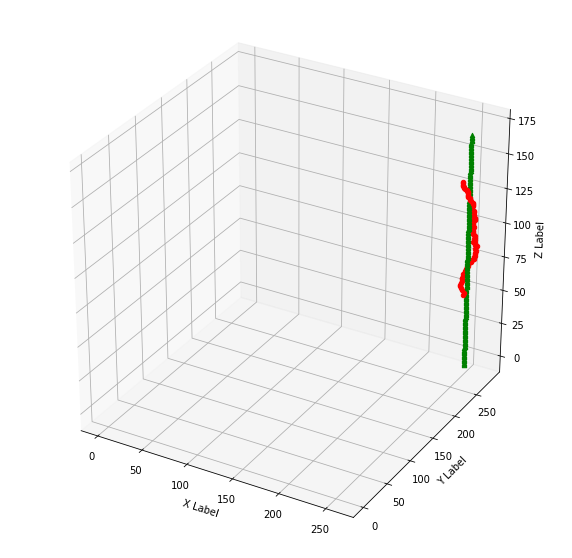

In [98]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(y)):   
    ax.scatter(x[i], y[i], z[i], c='r', marker='o')
    ax.scatter(xx[i], yy[i], z[i], c='g', marker='^')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### train_fla/test/58/images/Patient_58_198.png

In [84]:
# dicf.to_csv('test_2d_center.csv', index = False)

In [85]:
data_train = pd.read_csv('/public/lixin/SegTHOR/segthor/pre-process/train_info2.csv')
data_val = pd.read_csv('/public/lixin/SegTHOR/segthor/pre-process/val_info.csv')
data_train.head()

,Unnamed: 0,filename,maskname,folder,red,pink,yellow,blue,ys,ye,...,cyy,cyx,cry,crx,cpy,cpx,cby,cbx,cry2,crx2
0,0,train_fla/train/05/images/Patient_05_0.png,train_fla/train/05/masks/GT_05_0.png,5,0,0,0,0,118,480,...,262.0,244.0,291.0,262.0,249.0,280.0,276.0,270.0,NaN,NaN
1,1,train_fla/train/05/images/Patient_05_1.png,train_fla/train/05/masks/GT_05_1.png,5,0,0,0,0,118,480,...,262.0,244.0,291.0,262.0,249.0,280.0,276.0,270.0,NaN,NaN
2,2,train_fla/train/05/images/Patient_05_2.png,train_fla/train/05/masks/GT_05_2.png,5,0,0,0,0,118,480,...,262.0,244.0,291.0,262.0,249.0,280.0,276.0,270.0,NaN,NaN
3,3,train_fla/train/05/images/Patient_05_3.png,train_fla/train/05/masks/GT_05_3.png,5,0,0,0,0,118,480,...,262.0,244.0,291.0,262.0,249.0,280.0,276.0,270.0,NaN,NaN
4,4,train_fla/train/05/images/Patient_05_4.png,train_fla/train/05/masks/GT_05_4.png,5,0,0,0,0,118,480,...,262.0,244.0,291.0,262.0,249.0,280.0,276.0,270.0,NaN,NaN


In [86]:
data_val.head()

,Unnamed: 0,filename,maskname,folder,red,pink,yellow,blue,ys,ye,...,cyx,p_yellow,cry,crx,cpy,cpx,cby,cbx,cry2,crx2
0,0,train_fla/validates/01/images/Patient_01_0.png,train_fla/validates/01/masks/GT_01_0.png,1,0,0,0,0,99,509,...,258.0,0.0,260.0,254.0,207.0,264.0,253.0,252.0,NaN,NaN
1,1,train_fla/validates/01/images/Patient_01_1.png,train_fla/validates/01/masks/GT_01_1.png,1,0,0,0,0,99,509,...,258.0,0.0,260.0,254.0,207.0,264.0,253.0,252.0,NaN,NaN
2,2,train_fla/validates/01/images/Patient_01_2.png,train_fla/validates/01/masks/GT_01_2.png,1,0,0,0,0,99,509,...,258.0,0.0,260.0,254.0,207.0,264.0,253.0,252.0,NaN,NaN
3,3,train_fla/validates/01/images/Patient_01_3.png,train_fla/validates/01/masks/GT_01_3.png,1,0,0,0,0,99,509,...,258.0,0.0,260.0,254.0,207.0,264.0,253.0,252.0,NaN,NaN
4,4,train_fla/validates/01/images/Patient_01_4.png,train_fla/validates/01/masks/GT_01_4.png,1,0,0,0,0,99,509,...,258.0,0.0,260.0,254.0,207.0,264.0,253.0,252.0,NaN,NaN


In [87]:
name_list = data_train['filename'].values
mask_list = data_train['maskname'].values

In [88]:
data_folder = '/public/lixin/DATA/segthor/input/' + 'pink-normal/'
cry2 = []
crx2 = []
for file in mask_list:
    data = cv2.imread(os.path.join(data_folder, file), 0)
    mask = np.where(np.equal(data, 1), 1, 0) # pink 1
    if 1 in mask:
        y,x = mask_center_2d(mask)
        cry2.append(y)
        crx2.append(x)
    else:
        cry2.append(np.nan)
        crx2.append(np.nan)
        
data_train['cry2'] = cry2
data_train['crx2'] = crx2
# data_train.to_csv('/public/lixin/SegTHOR/segthor/pre-process/train_info2.csv',index=False)

In [89]:
data_val.head()

,Unnamed: 0,filename,maskname,folder,red,pink,yellow,blue,ys,ye,...,cyx,p_yellow,cry,crx,cpy,cpx,cby,cbx,cry2,crx2
0,0,train_fla/validates/01/images/Patient_01_0.png,train_fla/validates/01/masks/GT_01_0.png,1,0,0,0,0,99,509,...,258.0,0.0,260.0,254.0,207.0,264.0,253.0,252.0,NaN,NaN
1,1,train_fla/validates/01/images/Patient_01_1.png,train_fla/validates/01/masks/GT_01_1.png,1,0,0,0,0,99,509,...,258.0,0.0,260.0,254.0,207.0,264.0,253.0,252.0,NaN,NaN
2,2,train_fla/validates/01/images/Patient_01_2.png,train_fla/validates/01/masks/GT_01_2.png,1,0,0,0,0,99,509,...,258.0,0.0,260.0,254.0,207.0,264.0,253.0,252.0,NaN,NaN
3,3,train_fla/validates/01/images/Patient_01_3.png,train_fla/validates/01/masks/GT_01_3.png,1,0,0,0,0,99,509,...,258.0,0.0,260.0,254.0,207.0,264.0,253.0,252.0,NaN,NaN
4,4,train_fla/validates/01/images/Patient_01_4.png,train_fla/validates/01/masks/GT_01_4.png,1,0,0,0,0,99,509,...,258.0,0.0,260.0,254.0,207.0,264.0,253.0,252.0,NaN,NaN


In [90]:
data_train.head()

,Unnamed: 0,filename,maskname,folder,red,pink,yellow,blue,ys,ye,...,cyy,cyx,cry,crx,cpy,cpx,cby,cbx,cry2,crx2
0,0,train_fla/train/05/images/Patient_05_0.png,train_fla/train/05/masks/GT_05_0.png,5,0,0,0,0,118,480,...,262.0,244.0,291.0,262.0,249.0,280.0,276.0,270.0,NaN,NaN
1,1,train_fla/train/05/images/Patient_05_1.png,train_fla/train/05/masks/GT_05_1.png,5,0,0,0,0,118,480,...,262.0,244.0,291.0,262.0,249.0,280.0,276.0,270.0,NaN,NaN
2,2,train_fla/train/05/images/Patient_05_2.png,train_fla/train/05/masks/GT_05_2.png,5,0,0,0,0,118,480,...,262.0,244.0,291.0,262.0,249.0,280.0,276.0,270.0,NaN,NaN
3,3,train_fla/train/05/images/Patient_05_3.png,train_fla/train/05/masks/GT_05_3.png,5,0,0,0,0,118,480,...,262.0,244.0,291.0,262.0,249.0,280.0,276.0,270.0,NaN,NaN
4,4,train_fla/train/05/images/Patient_05_4.png,train_fla/train/05/masks/GT_05_4.png,5,0,0,0,0,118,480,...,262.0,244.0,291.0,262.0,249.0,280.0,276.0,270.0,NaN,NaN


In [91]:
y = data_train.loc[data_train['folder']==10]['cry2'].values

x = data_train.loc[data_train['folder']==10]['crx2'].values

In [92]:
yy = data_train.loc[data_train['folder']==10]['cry'].values

xx = data_train.loc[data_train['folder']==10]['crx'].values

In [93]:
len(y)

163

In [94]:
# fig = plt.figure()
# ax = fig.gca(projection='3d')

# z = range(len(y))
# # x = r * np.sin(theta)
# # y = r * np.cos(theta)
# ax.plot(x, y, z, label='parametric curve')
# ax.legend()

# plt.show()

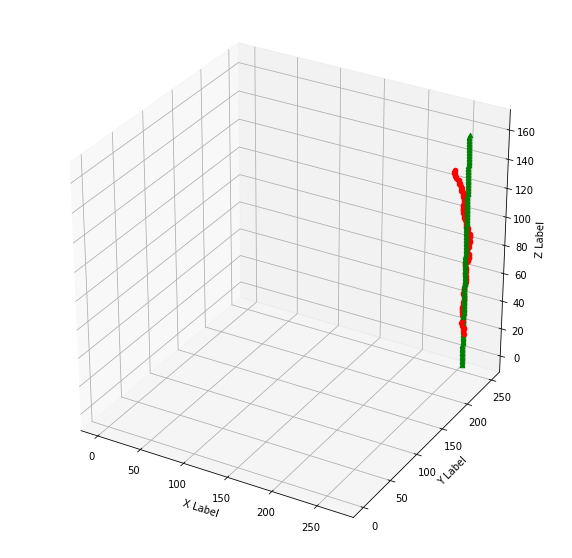

In [95]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(y)):   
    ax.scatter(x[i], y[i], z[i], c='r', marker='o')
    ax.scatter(xx[i], yy[i], z[i], c='g', marker='^')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()